# Máquina de Vetor de Suporte para Classificação de Flores

#Passo 1: Importação das Bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

#Passo 2: Carregar o Dataset e Preparar os Dados

In [ ]:
# Carregar o dataset Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Pegamos apenas duas características para facilitar a visualização (comprimento e largura da sépala)
y = iris.target  # Classes das flores

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3: Treinar o Modelo SVM

In [ ]:
# Criar o modelo SVM com kernel linear
# Outros Kernels: rbf (Radial Basis Function), poly (polinomial) e sigmoid.
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

#Passo 4: Fazer Previsões e Avaliar o Modelo

Acurácia do modelo: 0.90
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



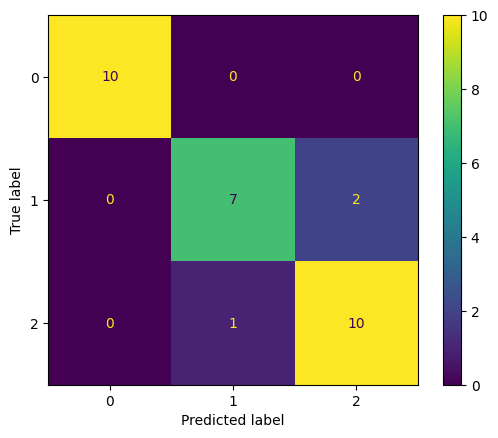

In [ ]:
# Fazer previsões nos dados de teste
y_pred = svm_model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Exibir relatório de classificação
print(classification_report(y_test, y_pred))

# Exibir matriz de confusão
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.show()


#Passo 5: Visualizar a Fronteira de Decisão

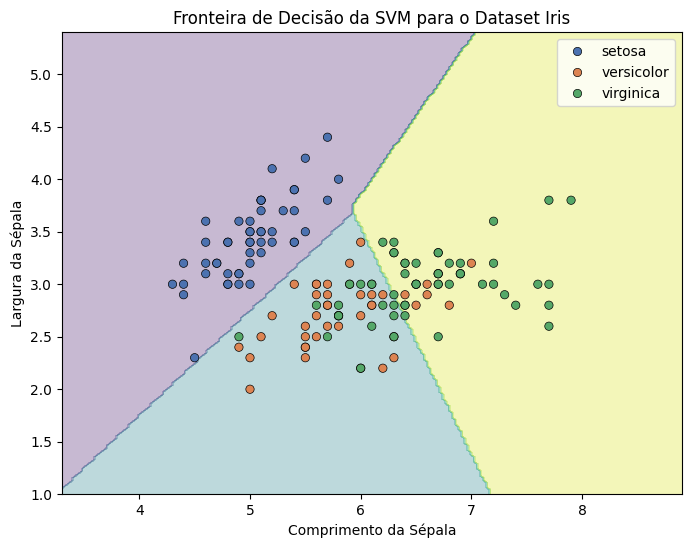

In [ ]:
# Criar uma grade de pontos para visualizar a separação das classes
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Fazer previsões para cada ponto da grade
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotar a fronteira de decisão
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette="deep", edgecolor="k")
plt.xlabel("Comprimento da Sépala")
plt.ylabel("Largura da Sépala")
plt.title("Fronteira de Decisão da SVM para o Dataset Iris")
plt.show()
